In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
corona_all=pd.read_csv("C:/data/서울시 코로나19 확진자 현황.csv")

In [3]:
corona_all.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,85145,2021-09-09,NaN,NaN,NaN,타시도,NaN,감염경로 조사중,NaN,-,NaN,2021-09-10 10:47,2021-09-10 10:47,Y
1,85144,2021-09-09,NaN,NaN,NaN,성북구,NaN,기타 확진자 접촉,NaN,-,NaN,2021-09-10 10:47,2021-09-10 10:47,Y
2,85143,2021-09-09,NaN,NaN,NaN,타시도,NaN,기타 확진자 접촉,NaN,-,NaN,2021-09-10 10:47,2021-09-10 10:47,Y
3,85142,2021-09-09,NaN,NaN,NaN,금천구,NaN,감염경로 조사중,NaN,-,NaN,2021-09-10 10:47,2021-09-10 10:47,Y
4,85141,2021-09-09,NaN,NaN,NaN,관악구,NaN,기타 확진자 접촉,NaN,-,NaN,2021-09-10 10:47,2021-09-10 10:47,Y


In [4]:
corona_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85145 entries, 0 to 85144
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      85145 non-null  int64  
 1   확진일     85145 non-null  object 
 2   환자번호    0 non-null      float64
 3   국적      0 non-null      float64
 4   환자정보    0 non-null      float64
 5   지역      85145 non-null  object 
 6   여행력     1631 non-null   object 
 7   접촉력     85145 non-null  object 
 8   조치사항    0 non-null      float64
 9   상태      85145 non-null  object 
 10  이동경로    0 non-null      float64
 11  등록일     85145 non-null  object 
 12  수정일     85145 non-null  object 
 13  노출여부    85145 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 9.1+ MB


In [5]:
corona_del_col=corona_all.drop(columns=['국적','환자정보','조치사항'])

In [6]:
corona_del_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85145 entries, 0 to 85144
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      85145 non-null  int64  
 1   확진일     85145 non-null  object 
 2   환자번호    0 non-null      float64
 3   지역      85145 non-null  object 
 4   여행력     1631 non-null   object 
 5   접촉력     85145 non-null  object 
 6   상태      85145 non-null  object 
 7   이동경로    0 non-null      float64
 8   등록일     85145 non-null  object 
 9   수정일     85145 non-null  object 
 10  노출여부    85145 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 7.1+ MB


In [7]:
corona_del_col['확진일']

0        2021-09-09
1        2021-09-09
2        2021-09-09
3        2021-09-09
4        2021-09-09
            ...    
85140    2020-01-31
85141    2020-01-30
85142    2020-01-30
85143    2020-01-30
85144    2020-01-24
Name: 확진일, Length: 85145, dtype: object

In [8]:

month = []
day = []

for data in corona_del_col['확진일']:
    month.append(data.split('-')[1])
    day.append(data.split('-')[2])

In [9]:
corona_del_col['month']=month
corona_del_col['day']=day

corona_del_col['month'].astype('int64')
corona_del_col['day'].astype('int64')

0         9
1         9
2         9
3         9
4         9
         ..
85140    31
85141    30
85142    30
85143    30
85144    24
Name: day, Length: 85145, dtype: int64

In [10]:
corona_del_col.head()


,연번,확진일,환자번호,지역,여행력,접촉력,상태,이동경로,등록일,수정일,노출여부,month,day
0,85145,2021-09-09,NaN,타시도,NaN,감염경로 조사중,-,NaN,2021-09-10 10:47,2021-09-10 10:47,Y,09,09
1,85144,2021-09-09,NaN,성북구,NaN,기타 확진자 접촉,-,NaN,2021-09-10 10:47,2021-09-10 10:47,Y,09,09
2,85143,2021-09-09,NaN,타시도,NaN,기타 확진자 접촉,-,NaN,2021-09-10 10:47,2021-09-10 10:47,Y,09,09
3,85142,2021-09-09,NaN,금천구,NaN,감염경로 조사중,-,NaN,2021-09-10 10:47,2021-09-10 10:47,Y,09,09
4,85141,2021-09-09,NaN,관악구,NaN,기타 확진자 접촉,-,NaN,2021-09-10 10:47,2021-09-10 10:47,Y,09,09


In [11]:
order=[]
for i in range(1,11):
    order.append(str(i))
    
order

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

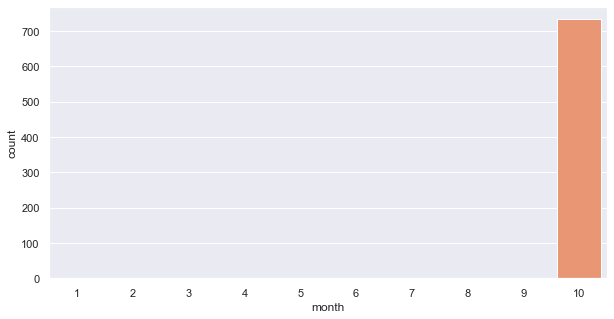

In [12]:
plt.figure(figsize=(10,5))

sns.set(style="darkgrid")
ax=sns.countplot(x="month",data=corona_del_col, palette="Set2",order=order)

<AxesSubplot:>

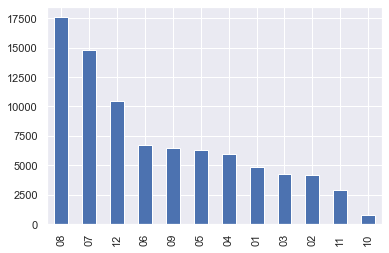

In [13]:
corona_del_col['month'].value_counts().plot(kind='bar')

In [14]:
corona_del_col['month'].value_counts()

08    17609
07    14785
12    10432
06     6717
09     6434
05     6259
04     5959
01     4885
03     4288
02     4140
11     2904
10      733
Name: month, dtype: int64

In [15]:
order2=[]
for i in range(1,32):
    order2.append(str(i))
order2

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31']

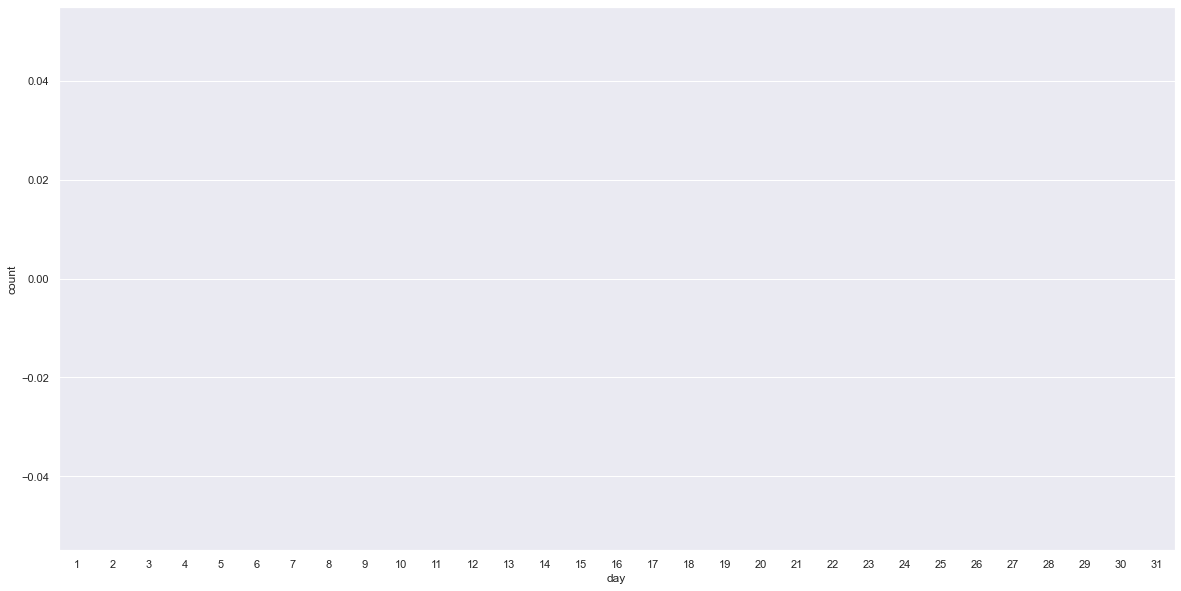

In [16]:
plt.figure(figsize=(20,10))
sns.set(style='darkgrid')
ax=sns.countplot(x="day",data=corona_del_col[corona_del_col['month']==10],palette="rocket_r", order=order2)

In [17]:
corona_del_col[corona_del_col['month']=='10']['day'].count()/31


23.64516129032258

In [18]:
corona_del_col[corona_del_col['month']=='10']['day'].value_counts().mean()

23.64516129032258

In [20]:
corona_del_col['지역']

0        타시도
1        성북구
2        타시도
3        금천구
4        관악구
        ... 
85140    성북구
85141    마포구
85142    종로구
85143    중랑구
85144    강서구
Name: 지역, Length: 85145, dtype: object

In [22]:
import matplotlib.font_manager as fm
font_dirs=['/usr/share/fonts/truetype/nanum', ]
font_files=fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

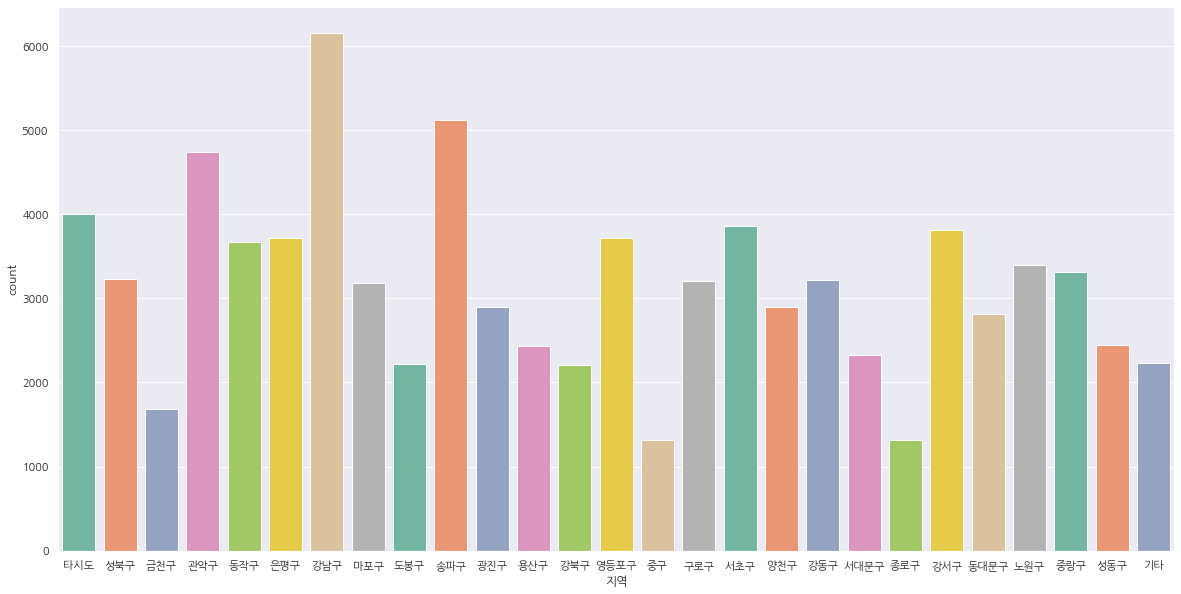

In [27]:
plt.figure(figsize=(20,10))
# 한글 출력을 위해서 폰트 옵션을 설정합니다.
sns.set(font="NanumGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax=sns.countplot(x="지역", data=corona_del_col, palette="Set2")

In [25]:
plt.rcParams['font.family'] = 'NanumGothic'

In [29]:
corona_out_region=corona_del_col.copy()

In [33]:
corona_out_region[corona_del_col['month'] == '8']

,연번,확진일,환자번호,지역,여행력,접촉력,상태,이동경로,등록일,수정일,노출여부,month,day


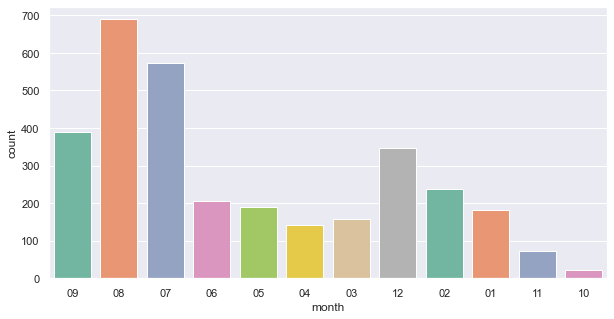

In [39]:
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
ax=sns.countplot(x="month",data=corona_out_region[corona_out_region["지역"]=="구로구"],palette="Set2")

In [40]:
import folium

In [41]:
map_osm=folium.Map(location=[37.529622, 126.984307], Zoom_start=11)
map_osm

In [42]:
CRS=pd.read_csv("c:/data/서울시 행정구역 시군구 정보 (좌표계_ WGS1984).csv")

In [43]:
CRS

,순번,시군구코드,시군구명_한글,시군구명_영문,ESRI_PK,위도,경도
0,1,11320,도봉구,Dobong-gu,0,37.665861,127.031767
1,2,11380,은평구,Eunpyeong-gu,1,37.617612,126.922700
2,3,11230,동대문구,Dongdaemun-gu,2,37.583801,127.050700
3,4,11590,동작구,Dongjak-gu,3,37.496504,126.944307
4,5,11545,금천구,Geumcheon-gu,4,37.460097,126.900155
5,6,11530,구로구,Guro-gu,5,37.495486,126.858121
6,7,11110,종로구,Jongno-gu,6,37.599100,126.986149
7,8,11305,강북구,Gangbuk-gu,7,37.646995,127.014716
8,9,11260,중랑구,Jungnang-gu,8,37.595379,127.093967
9,10,11680,강남구,Gangnam-gu,9,37.495985,127.066409


In [52]:
# corona_out_region의 지역에는 'oo구' 이외로 `타시도`, `기타`에 해당되는 데이터가 존재 합니다.
# 위 데이터에 해당되는 위도, 경도를 찾을 수 없기에 삭제하여 corona_seoul로 저장합니다.
corona_seoul = corona_out_region.drop(corona_out_region[corona_out_region['지역'] == '타시도'].index)
corona_seoul = corona_seoul.drop(corona_out_region[corona_out_region['지역'] == '기타'].index)

# 서울 중심지 중구를 가운데 좌표로 잡아 지도를 출력합니다.
map_osm = folium.Map(location=[37.557945, 126.99419], zoom_start=1)

# 지역 정보를 set 함수를 사용하여 25개 고유의 지역을 뽑아냅니다.
for region in set(corona_seoul['지역']):

    # 해당 지역의 데이터 개수를 count에 저장합니다.
    count = len(corona_seoul[corona_seoul['지역'] == region])
    # 해당 지역의 데이터를 CRS에서 뽑아냅니다.
    CRS_region = CRS[CRS['시군구명_한글'] == region]

    # CircleMarker를 사용하여 지역마다 원형마커를 생성합니다.
    marker = folium.CircleMarker([CRS_region['위도'], CRS_region['경도']], # 위치
                                  radius=count/10 + 10,                 # 범위
                                  color='#3186cc',            # 선 색상
                                  fill_color='#3186cc',       # 면 색상
                                  popup=' '.join((region, str(count), '명'))) # 팝업 설정
    
    # 생성한 원형마커를 지도에 추가합니다.
    marker.add_to(map_osm)

map_osm